In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
images = []
labels= []
path = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask'
for image in tqdm(os.listdir(path)):
    
    img = load_img(os.path.join(path,image),target_size=(128,128))
    img = img_to_array(img,dtype='uint8')
    images.append(img)
    labels.append(1)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [4]:
path = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask'
for image in tqdm(os.listdir(path)):
    
    img = load_img(os.path.join(path,image),target_size=(128,128))
    img = img_to_array(img,dtype='uint8')
    images.append(img)
    labels.append(0)

  0%|          | 0/5000 [00:00<?, ?it/s]

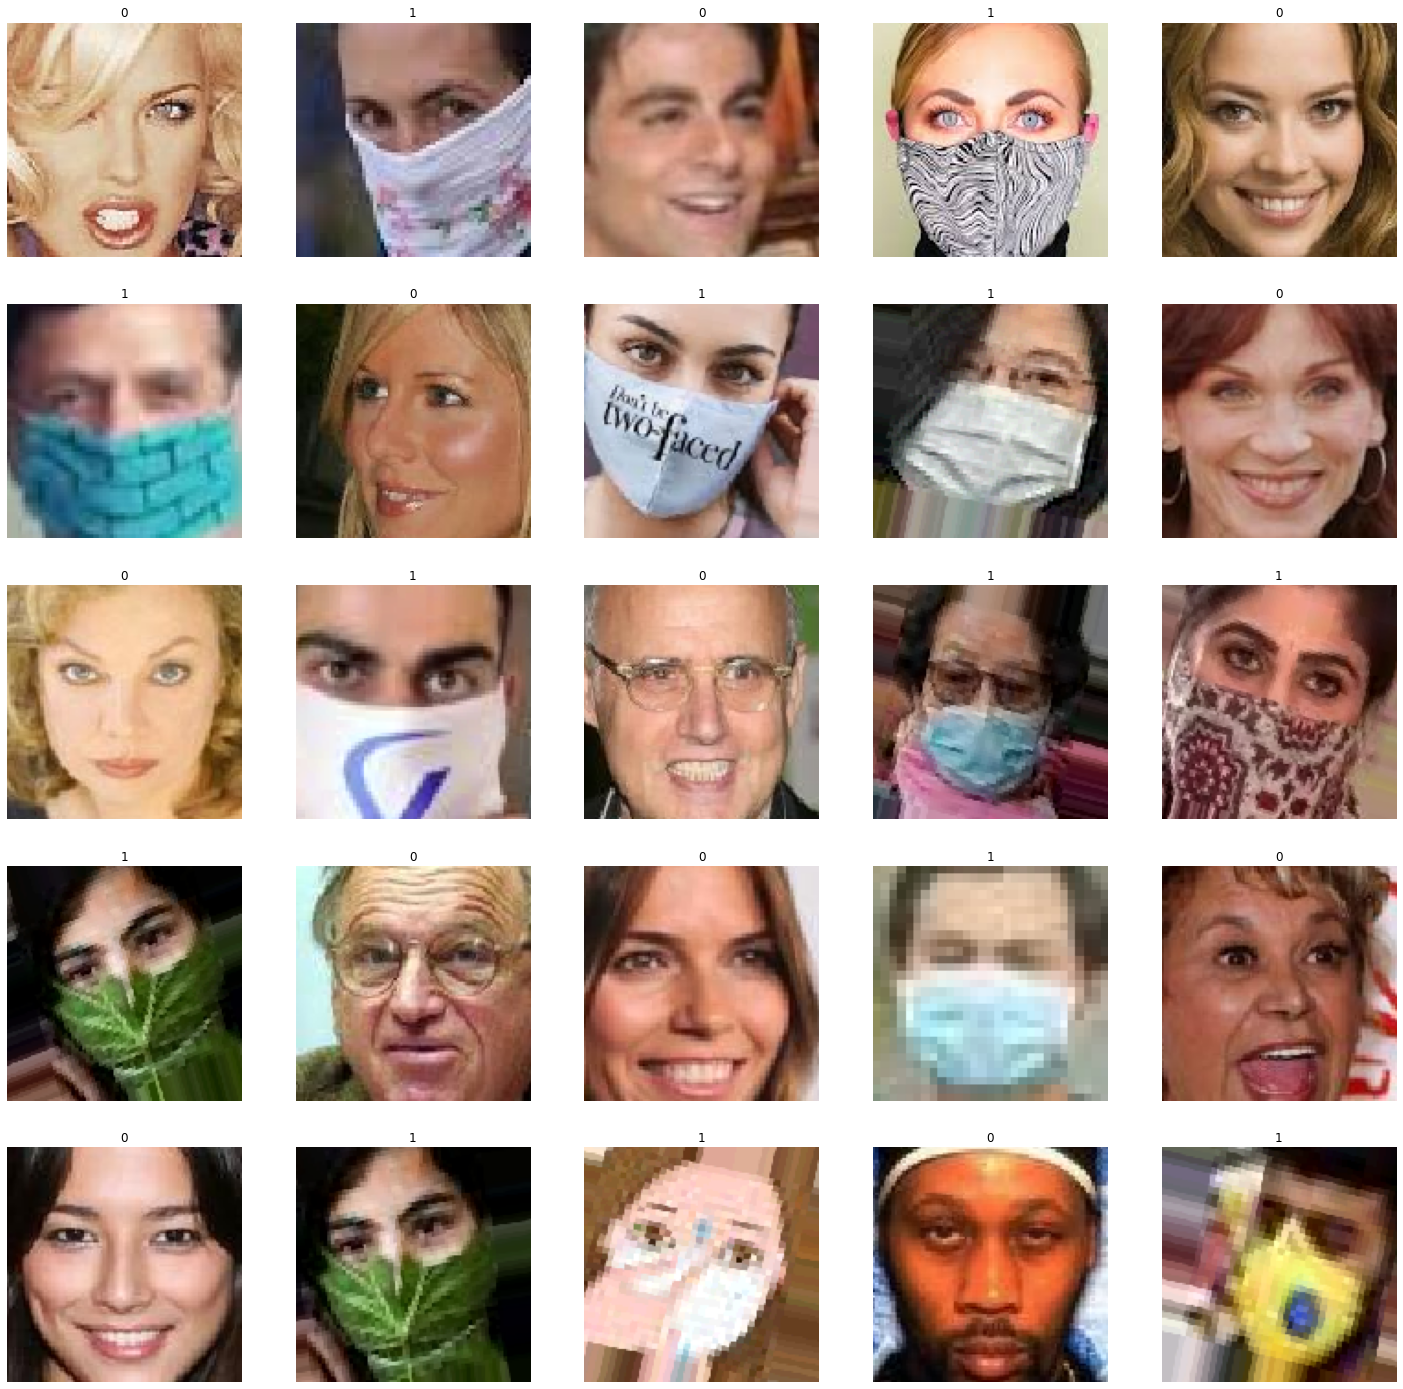

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    random = np.random.choice(range(10000))
    plt.imshow(images[random])
    plt.title(labels[random])
    plt.axis('off')

In [6]:
val_images = []
val_labels = []
path = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask'
for image in tqdm(os.listdir(path)):
    
    img = load_img(os.path.join(path,image),target_size=(128,128))
    img = img_to_array(img,dtype='uint8')
    val_images.append(img)
    val_labels.append(1)
    
path = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask'
for image in tqdm(os.listdir(path)):
    
    img = load_img(os.path.join(path,image),target_size=(128,128))
    img = img_to_array(img,dtype='uint8')
    val_images.append(img)
    val_labels.append(0)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

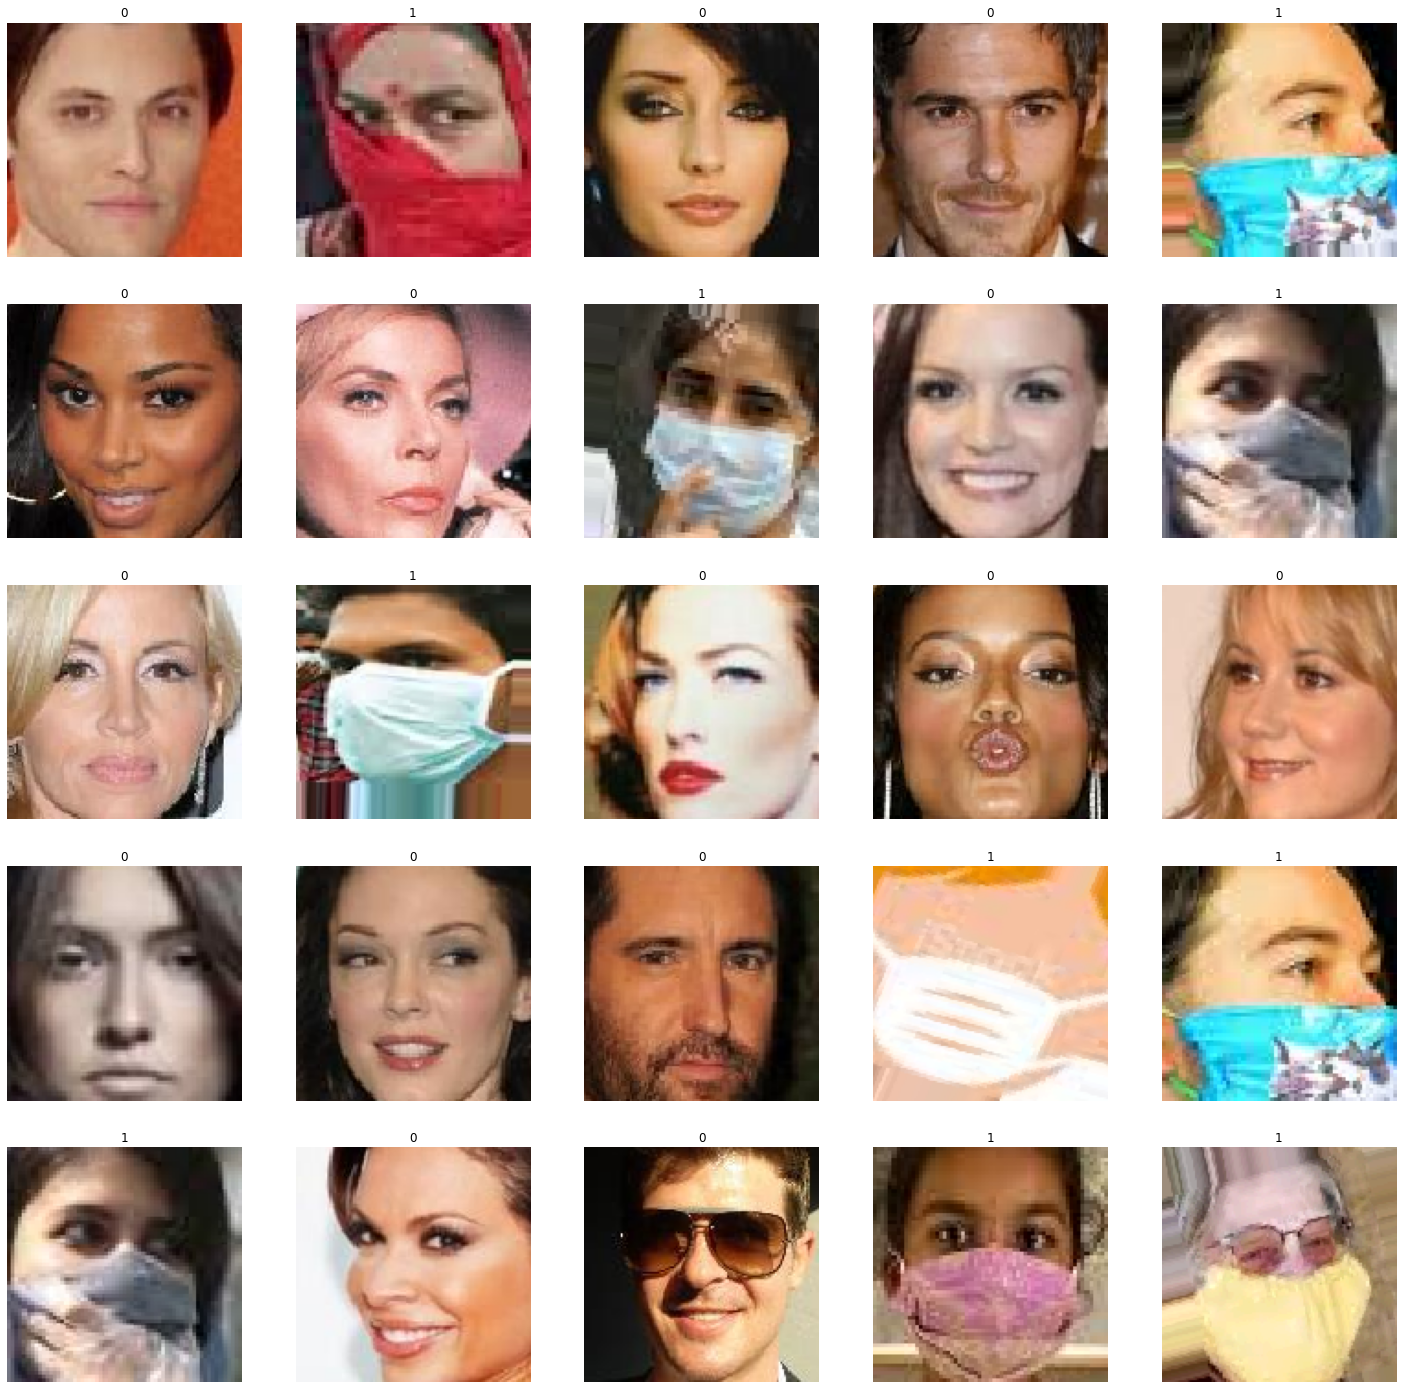

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    random = np.random.choice(range(800))
    plt.imshow(val_images[random])
    plt.title(val_labels[random])
    plt.axis('off')

In [8]:
images = np.array(images)
labels = np.array(labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [9]:
images = images/255
val_images = val_images/255

In [10]:
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Flatten,MaxPooling2D
from tensorflow.keras.models import Model,Sequential

In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add((Conv2D(64,(3,3),activation='relu')))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

2022-09-14 14:29:40.193578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 14:29:40.372758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 14:29:40.373560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 14:29:40.374783: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [14]:
model.fit(images,labels,batch_size=64,epochs=20,validation_data=(val_images,val_labels))

2022-09-14 14:29:54.575277: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1966080000 exceeds 10% of free system memory.
2022-09-14 14:29:56.729789: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1966080000 exceeds 10% of free system memory.
2022-09-14 14:29:58.308158: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-09-14 14:30:00.223631: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


157/157 [==============================] - 12s 28ms/step - loss: 0.1178 - accuracy: 0.9598 - val_loss: 0.2918 - val_accuracy: 0.9700
Epoch 2/20
157/157 [==============================] - 3s 22ms/step - loss: 0.0373 - accuracy: 0.9869 - val_loss: 0.2062 - val_accuracy: 0.9688
Epoch 3/20
157/157 [==============================] - 3s 22ms/step - loss: 0.0264 - accuracy: 0.9908 - val_loss: 0.1087 - val_accuracy: 0.9538
Epoch 4/20
157/157 [==============================] - 3s 22ms/step - loss: 0.0194 - accuracy: 0.9931 - val_loss: 0.1696 - val_accuracy: 0.9425
Epoch 5/20
157/157 [==============================] - 4s 24ms/step - loss: 0.0161 - accuracy: 0.9953 - val_loss: 0.2320 - val_accuracy: 0.9300
Epoch 6/20
157/157 [==============================] - 3s 22ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0103 - val_accuracy: 0.9962
Epoch 7/20
157/157 [==============================] - 3s 22ms/step - loss: 0.0144 - accuracy: 0.9947 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 8/2

In [15]:
test_images = []
test_labels = []
path = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithMask'
for image in tqdm(os.listdir(path)):
    
    img = load_img(os.path.join(path,image),target_size=(128,128))
    img = img_to_array(img,dtype='uint8')
    test_images.append(img)
    test_labels.append(1)
    
path = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask'
for image in tqdm(os.listdir(path)):
    
    img = load_img(os.path.join(path,image),target_size=(128,128))
    img = img_to_array(img,dtype='uint8')
    test_images.append(img)
    test_labels.append(0)

  0%|          | 0/483 [00:00<?, ?it/s]

  0%|          | 0/509 [00:00<?, ?it/s]

In [16]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [17]:
test_images = test_images/255

In [32]:
model.evaluate(test_images,test_labels)

31/31 [==============================] - 0s 6ms/step - loss: 0.0469 - accuracy: 0.9869


[0.04694116860628128, 0.9868951439857483]

In [33]:
model.save('mask.h5')

In [34]:
import xml.etree.ElementTree as ET

In [ ]:
classes = {'with_mask':0,'without_mask':1,'mask_weared_incorrect':2}
default = [0,0,0,0,-1]

images = []
annotations = []
for path in os.listdir('../input/face-mask-detection/annotations'):
    
    
    tree = ET.parse(os.path.join('../input/face-mask-detection/annotations',path))
    root = tree.getroot()
    
    imgpath = os.path.join('../input/face-mask-detection/images',path[:-4]+'.png')
    image = cv2.imread(imgpath)
    height,width = image.shape[:2]
    
    
    
    flag = False
    labels = []
    notations = []
    for neighbor in root.iter('object'):
        labels.append(neighbor.find('name').text)
    for i,neighbor in enumerate(root.iter('bndbox')):
        xmin = int(neighbor.find('xmin').text)/width * 224
        ymin = int(neighbor.find('ymin').text)/height * 224
        xmax = int(neighbor.find('xmax').text)/width * 224
        ymax = int(neighbor.find('ymax').text)/height * 224
        notations.append([xmin,ymin,xmax,ymax,classes[labels[i]]])
        if i==5:
            flag = True
            break
    for i in range(i,4):
        notations.append(default)
    
    
    if not flag:
        annotations.append(notations)
        image = cv2.resize(image,(224,224))
        images.append(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    


In [129]:
tree = ET.parse('../input/face-mask-detection/annotations/maksssksksss1.xml')
root = tree.getroot()

In [130]:
image = load_img('../input/face-mask-detection/images/maksssksksss1.png')
image = img_to_array(image,dtype='uint8')
height,width = image.shape[:2]
    

In [131]:
notations = []
for i,neighbor in enumerate(root.iter('bndbox')):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text) 
    xmax = int(neighbor.find('xmax').text) 
    ymax = int(neighbor.find('ymax').text)
    notations.append([xmin,ymin,xmax,ymax])


In [132]:
notations

[[321, 34, 354, 69],
 [224, 38, 261, 73],
 [299, 58, 315, 81],
 [143, 74, 174, 115],
 [74, 69, 95, 99],
 [191, 67, 221, 93],
 [21, 73, 44, 93],
 [369, 70, 398, 99],
 [83, 56, 111, 89]]

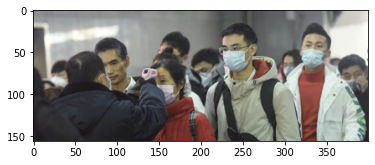

In [133]:
plt.imshow(image)

(-0.5, 399.5, 155.5, -0.5)

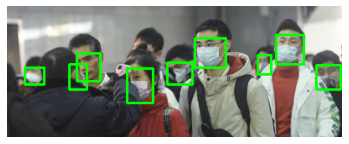

In [134]:
import cv2
img = image.copy()
for notation in notations:
    [xmin,ymin,xmax,ymax] = notation
    cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),2)
            
plt.imshow(img)
plt.axis('off')

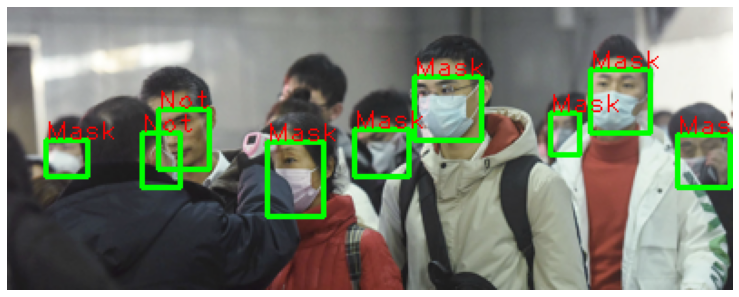

In [135]:
plt.figure(figsize=(13,13))
orig_imag = image.copy()
for notation in notations:
    [xmin,ymin,xmax,ymax] = notation
    img = image[ymin:ymax,xmin:xmax]
    img = cv2.resize(img,(128,128))
    img=img/255
    pred = model.predict(img.reshape(-1,128,128,3))
    cv2.rectangle(orig_imag,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    if pred[0][0]>0.90:
        text='Mask'
    else:
        text = 'Not'
    cv2.putText(orig_imag,text,org=(xmin,ymin),fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale=1,color = (255,0,0))

plt.imshow(orig_imag)
plt.axis('off')
plt.show()